In [99]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

In [100]:
X = df.iloc[:,0:8]
Y = df.iloc[:,-1]

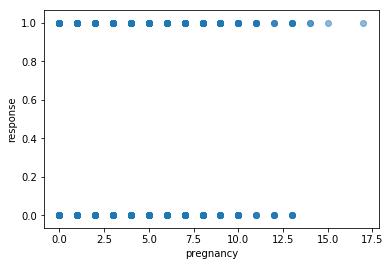

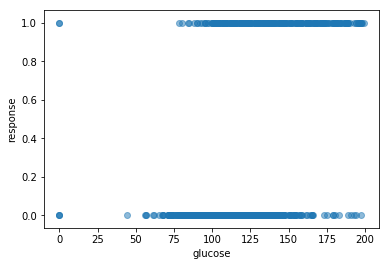

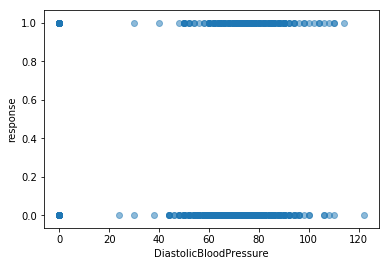

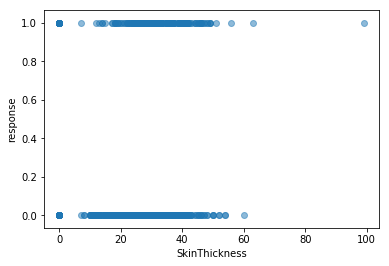

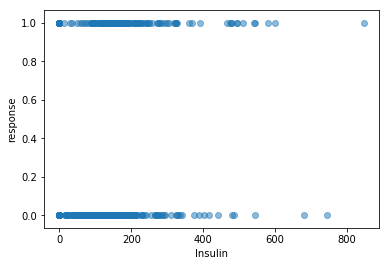

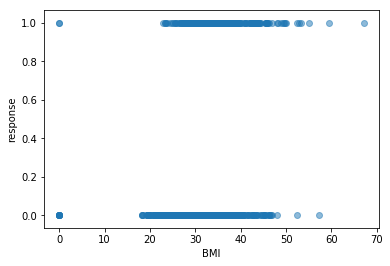

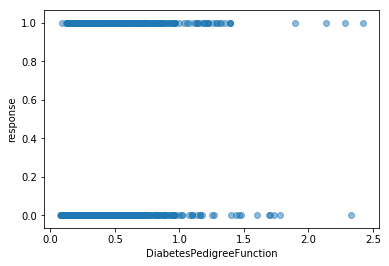

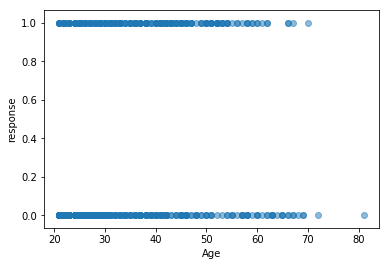

In [101]:
import matplotlib.pyplot as plt

x0 = df.iloc[:,0]
x1 = df.iloc[:,1]
x2 = df.iloc[:,2]
x3 = df.iloc[:,3]
x4 = df.iloc[:,4]
x5 = df.iloc[:,5]
x6 = df.iloc[:,6]
x7 = df.iloc[:,7]
y = df.iloc[:,-1]

plt.scatter(x0, y, alpha=0.5)
plt.xlabel('pregnancy')
plt.ylabel('response')
plt.show()

plt.scatter(x1, y, alpha=0.5)
plt.xlabel('glucose')
plt.ylabel('response')
plt.show()

plt.scatter(x2, y, alpha=0.5)
plt.xlabel('DiastolicBloodPressure')
plt.ylabel('response')
plt.show()

plt.scatter(x3, y, alpha=0.5)
plt.xlabel('SkinThickness')
plt.ylabel('response')
plt.show()

plt.scatter(x4, y, alpha=0.5)
plt.xlabel('Insulin')
plt.ylabel('response')
plt.show()

plt.scatter(x5, y, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('response')
plt.show()

plt.scatter(x6, y, alpha=0.5)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('response')
plt.show()

plt.scatter(x7, y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('response')
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

seed = 7
test_size = 0.2
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = test_size, random_state = seed)

imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
train_x_imputed = imputer.fit_transform(train_x)
test_x_imputed = imputer.fit_transform(test_x)

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier()
RandomForest.fit(train_x_imputed,train_y)
hyp = RandomForest.predict(test_x_imputed)

print('Random Forest Accuracy : ', accuracy_score(test_y,hyp))

Random Forest Accuracy :  0.8181818181818182


In [117]:
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
XGBClassifier.fit(train_x_imputed, train_y)
hyp = XGBClassifier.predict(test_x_imputed)

print('XGBClassifier Accuracy : ', accuracy_score(test_y,hyp))

XGBClassifier Accuracy :  0.7987012987012987


In [128]:
from sklearn.model_selection import GridSearchCV

grid_params = {'criterion': ('entropy', 'gini'), 'max_depth': list(range(2,7))}

RFclassifier = GridSearchCV(RandomForest, grid_params)
RFclassifier.fit(train_x_imputed, train_y)
# print(RFclassifier.estimator.get_params().keys())

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('entropy', 'gini'), 'max_depth': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [129]:
print('GridSearchCV RFclassifier Accuracy : ', accuracy_score(test_y,RFclassifier.predict(test_x_imputed)))

GridSearchCV RFclassifier Accuracy :  0.7987012987012987


In [132]:
from sklearn.model_selection import GridSearchCV
import warnings; warnings.simplefilter('ignore')
from xgboost import XGBClassifier

grid_params = {'learning_rate':(.1,.2,.3),'n_estimators':(1,2,3), 'max_depth':list(range(2,7))}

XGBC = XGBClassifier()

XGBclassifier = GridSearchCV(XGBC, grid_params, cv = 5)
XGBclassifier.fit(train_x_imputed, train_y)
# print(classifier.estimator.get_params().keys())

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': (0.1, 0.2, 0.3), 'n_estimators': (1, 2, 3), 'max_depth': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [133]:
print('GridSearchCV XGBclassifier Accuracy : ', accuracy_score(test_y,XGBclassifier.predict(test_x_imputed)))

GridSearchCV XGBclassifier Accuracy :  0.7467532467532467
